<h1 align="center"><font size="5">Seyedali Rafazi</font></h1>

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [98]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
import matplotlib.ticker as ticker
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load Data From CSV File  

In [2]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.shape

(2000, 21)

### Data Exploration
Let's first have a descriptive exploration on our data.


In [5]:
# summarize the data
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Let's select some features to explore more.


In [20]:
cdf = df[['battery_power','clock_speed','ram','talk_time']]
cdf.head(9)

,battery_power,clock_speed,ram,talk_time
0,842,2.2,2549,19
1,1021,0.5,2631,7
2,563,0.5,2603,9
3,615,2.5,2769,11
4,1821,1.2,1411,15
5,1859,0.5,1067,10
6,1821,1.7,3220,18
7,1954,0.5,700,5
8,1445,0.5,1099,20


We can plot each of these features:


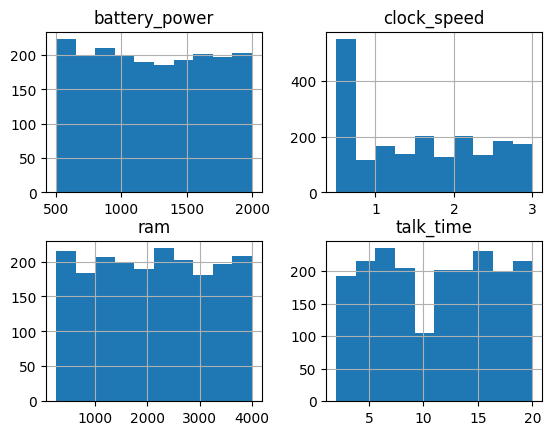

In [21]:
viz = cdf[['battery_power','clock_speed','ram','talk_time']]
viz.hist()
plt.show()

Now, let's plot each of these features against the talk_time, to see how linear their relationship is:


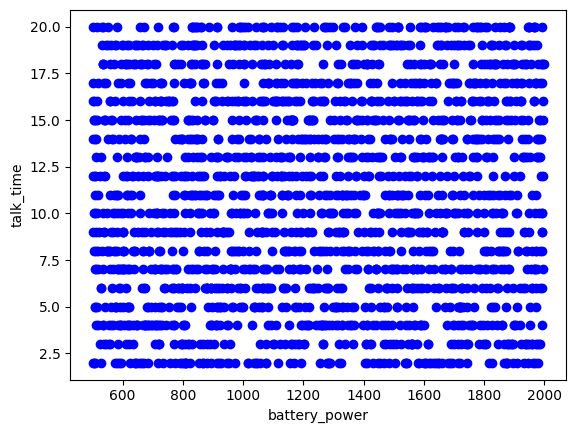

In [23]:
plt.scatter(cdf.battery_power, cdf.talk_time,  color='blue')
plt.xlabel("battery_power")
plt.ylabel("talk_time")
plt.show()

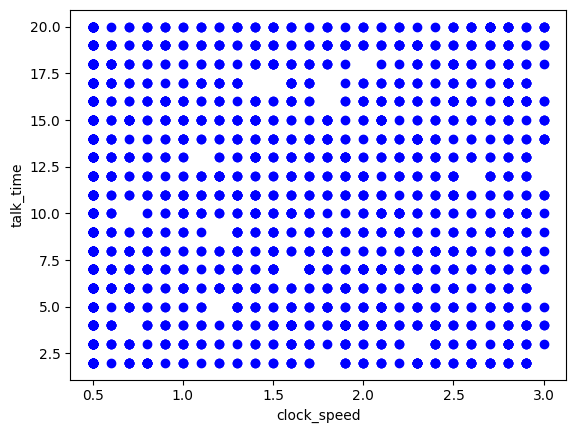

In [24]:
plt.scatter(cdf.clock_speed, cdf.talk_time,  color='blue')
plt.xlabel("clock_speed")
plt.ylabel("talk_time")
plt.show()

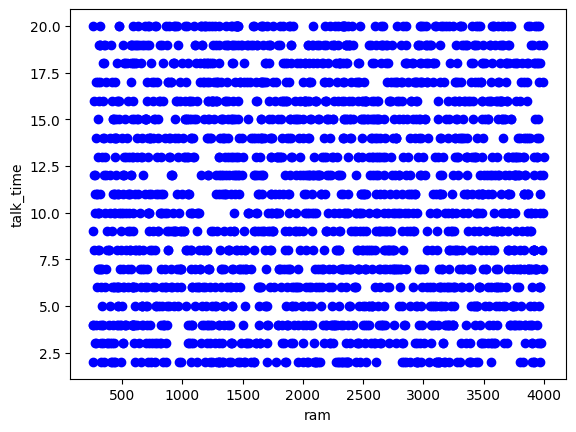

In [25]:
plt.scatter(cdf.ram, cdf.talk_time,  color='blue')
plt.xlabel("ram")
plt.ylabel("talk_time")
plt.show()

#### Modeling
Using sklearn package to model data.


In [26]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [27]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['battery_power']])
train_y = np.asanyarray(train[['talk_time']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00086304]]
Intercept:  [9.96637603]


In [30]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['clock_speed']])
train_y = np.asanyarray(train[['talk_time']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.0433669]]
Intercept:  [10.96477725]


In [31]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ram']])
train_y = np.asanyarray(train[['talk_time']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[5.56353326e-06]]
Intercept:  [11.01927633]


#### Plot outputs
We can plot the fit line over the data:


Text(0, 0.5, 'talk_time')

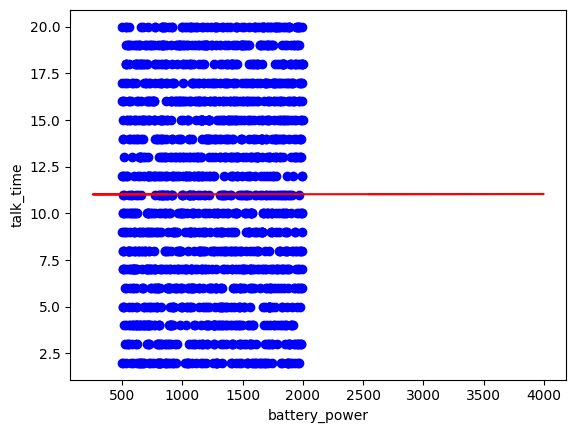

In [33]:
plt.scatter(train.battery_power, train.talk_time,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("battery_power")
plt.ylabel("talk_time")

#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

In [34]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['battery_power']])
test_y = np.asanyarray(test[['talk_time']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 4.74
Residual sum of squares (MSE): 30.04
R2-score: -0.00


## Train/Test dataset
We split our dataset into train and test set:


In [40]:
X = np.asarray(df[['battery_power','clock_speed','ram']])
X[0:5]

array([[8.420e+02, 2.200e+00, 2.549e+03],
       [1.021e+03, 5.000e-01, 2.631e+03],
       [5.630e+02, 5.000e-01, 2.603e+03],
       [6.150e+02, 2.500e+00, 2.769e+03],
       [1.821e+03, 1.200e+00, 1.411e+03]])

In [41]:
y = np.asarray(df['talk_time'])
y [0:5]

array([19,  7,  9, 11, 15], dtype=int64)

Also, we normalize the dataset:


In [43]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.90259726,  0.83077942,  0.39170341],
       [-0.49513857, -1.2530642 ,  0.46731702],
       [-1.5376865 , -1.2530642 ,  0.44149774],
       [-1.41931861,  1.19851653,  0.59456919],
       [ 1.32590586, -0.39501094, -0.65766599]])

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1600, 3) (1600,)
Test set: (400, 3) (400,)


## <h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>

Let's build our model using **LogisticRegression** from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
**C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization.
Now let's fit our model with train set:



In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Now we can predict using our test set:


In [47]:
yhat = LR.predict(X_test)
yhat

array([ 7, 19, 18, 19,  7, 14,  7,  4,  7,  7,  7,  7, 15, 14, 18,  4, 14,
        7,  4, 20,  7,  4, 17, 20, 20, 19, 19,  6, 18, 19,  6,  7,  7,  7,
       19,  7, 19,  7,  7,  7, 15,  7, 14, 14, 18, 17,  4,  7, 18, 18,  7,
        4,  4, 14, 14, 15,  7,  7,  7, 14, 17,  4,  7, 20, 17, 18,  7, 19,
       20, 17,  4,  6, 14, 18,  6, 20,  7,  7, 18,  7,  4,  4,  7,  4,  7,
       18, 14, 19, 19,  4, 18,  4,  7, 14,  7, 18,  4, 18,  4,  7,  7, 18,
       17, 16,  4,  7,  7, 20,  7, 19, 14,  7,  4,  7,  7,  4, 17, 17, 15,
        7, 18, 18,  7,  6, 20,  7,  7, 19, 17,  6, 18,  7,  4,  4, 18,  4,
        4, 18,  7, 19, 18, 17, 14,  4, 19, 14,  7, 18,  7, 18,  4,  4,  7,
        4, 19, 18, 17,  4, 15, 15,  7,  6, 18,  7,  7, 17,  7,  7, 20,  7,
        4,  7, 14,  7, 14,  4,  4, 18,  7,  7,  7,  4, 17, 14, 17,  7, 19,
        7, 18, 20, 14,  7,  4, 19, 14,  7,  6,  7,  7,  4,  6,  6, 18,  7,
        7,  7,  7,  7,  7, 18,  4,  7, 19,  4, 18,  7,  4, 17,  4,  4, 18,
        7,  4,  4, 14,  7

**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):


In [48]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.05393966, 0.04659509, 0.05619574, ..., 0.04855999, 0.05497375,
        0.05297481],
       [0.05225309, 0.0523959 , 0.05488062, ..., 0.04634662, 0.05667008,
        0.05381199],
       [0.04914203, 0.05572814, 0.04822311, ..., 0.05754217, 0.05096327,
        0.05139149],
       ...,
       [0.05459914, 0.04666296, 0.05920226, ..., 0.04659501, 0.05608962,
        0.05162242],
       [0.05300756, 0.04837425, 0.05513209, ..., 0.05101112, 0.05381473,
        0.05163599],
       [0.05236621, 0.05160201, 0.05705952, ..., 0.0510668 , 0.05399609,
        0.04870439]])

## Create Regression Tree


In [73]:
data = pd.read_csv('train.csv')

In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X = data.drop(columns=["talk_time"])
Y = data["talk_time"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)
regression_tree = DecisionTreeRegressor(criterion = "squared_error")

regression_tree.fit(X_train, Y_train)

print(regression_tree.score(X_test, Y_test))

prediction = regression_tree.predict(X_test)

print("$",(prediction - Y_test).abs().mean()*1000)

-1.0981564013818854
$ 6647.5


<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [77]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [78]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (1400, 20) &  Size of Y training set (1400,)


In [79]:
print('Shape of X X_testing set {}'.format(X_testset.shape),'&',' Size of Y testing set {}'.format(y_testset.shape))

Shape of X X_testing set (600, 20) &  Size of Y testing set (600,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [82]:
data = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
data # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [83]:
data.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [84]:
predTree = data.predict(X_testset)

In [85]:
print (predTree [0:5])
print (y_testset [0:5])


[19 19 13 19  4]
[ 9 18  8 20 15]


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [86]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.05333333333333334


<hr>

<div id="visualization">
    <h2>Visualization</h2>
    
    
Let's visualize the tree
</div>


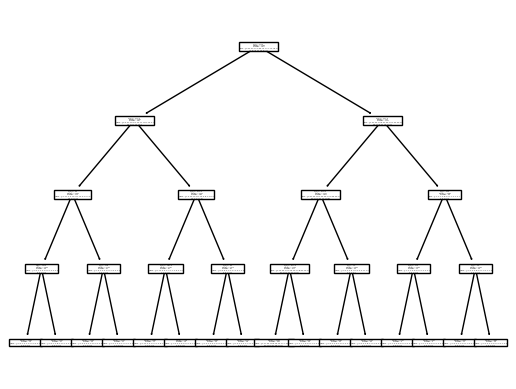

In [88]:
import sklearn.tree as tree

tree.plot_tree(data)
plt.show()

<h3>K nearest neighbor (KNN)</h3>


In [92]:
from sklearn.neighbors import KNeighborsClassifier


k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [94]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_test = scaler.transform(X_test.astype(float))
X_test[0:5]

array([[-0.49109398, -0.99128795,  1.33165174,  0.96680078, -0.53311654,
         0.96438384,  0.69389221, -0.6945754 ,  1.43718691, -0.66646067,
        -0.96854633, -1.03704342,  0.10644126, -1.04633529,  0.64173366,
        -1.08429256,  0.56965192, -1.02020406, -1.01384584, -1.325921  ],
       [-0.56454768,  1.00878862,  0.35176429, -1.03433926, -0.76402787,
        -1.03693152,  0.69389221,  0.68551853,  1.15176177,  1.07734484,
        -0.4733373 ,  0.69698864, -0.55302504, -0.80392398,  1.59465602,
         1.66946632,  0.56965192,  0.98019606, -1.01384584, -1.325921  ],
       [-1.46665102,  1.00878862, -1.24055283, -1.03433926, -0.07129387,
         0.96438384, -1.23196217, -1.38462236, -1.67394706,  0.64139346,
        -0.63840697, -1.19324214,  0.63908712, -0.19012022,  0.87996425,
        -0.62533275,  0.56965192,  0.98019606,  0.98634324, -0.43229269],
       [ 0.6015299 , -0.99128795, -1.1180669 ,  0.96680078, -0.76402787,
        -1.03693152, -0.02142513,  0.68551853, -

In [99]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.04  , 0.04  , 0.0525, 0.0525, 0.0525, 0.0525, 0.0525, 0.0525,
       0.0525])

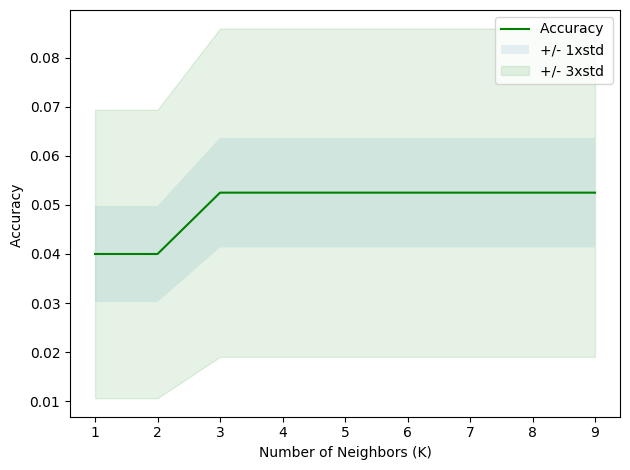

In [100]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

<h2 id="modeling">Modeling (SVM with Scikit-learn)</h2>


In [101]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [102]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [103]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00        24
           8       0.00      0.00      0.00        24
           9       0.00      0.00      0.00        23
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00        20
          13       0.05      1.00      0.10        21
          14       0.00      0.00      0.00        18
          15       0.00      0.00      0.00        20
          16       0.00      0.00      0.00        28
          17       0.00      0.00      0.00        16
          18       0.00      0.00      0.00        17
          19       0.00    

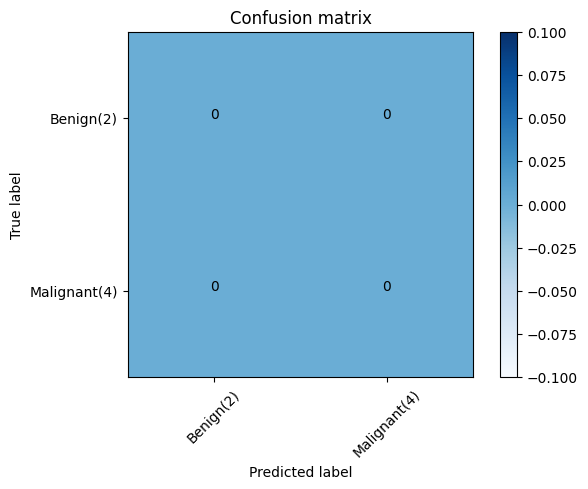

In [104]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')